<a href="https://colab.research.google.com/github/wagneraljr/GraphEmbeddingExamples/blob/main/grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install node2vec
!pip install tensorflow
!pip install git+https://github.com/palash1992/GEM.git
!pip install git+https://github.com/stellargraph/stellargraph.git
!pip install karateclub
!pip install python-Levenshtein

In [ ]:
import networkx as nx
import pandas as pd
import os
import random
#from node2vec import Node2Vec
#from node2vec.edges import HadamardEmbedder
#from karateclub import Graph2Vec
import matplotlib.pyplot as plt
%matplotlib inline
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

# 1.1 Introdução a grafos

## Plotar grafos

In [ ]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    #pos_attrs = {}
    #for node, coords in pos_nodes.items():
    #    pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    #nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
       # pos_attrs = {}
        #for node, coords in pos_nodes.items():
        #    pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        #nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Grafos não direcionados

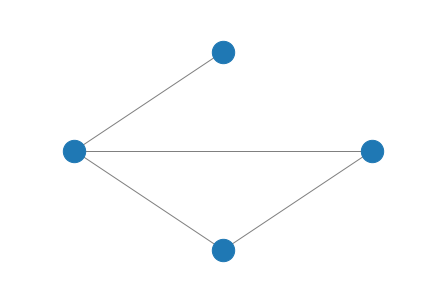

In [ ]:
G = nx.Graph()
V = ['Alice', 'Bob', 'Charlie', 'Dave']
E = [('Alice','Bob'), ('Bob','Charlie'), ('Alice','Charlie'), ('Alice','Dave')]

G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [ ]:
print(f'V = {G.nodes}')
print(f'E = {G.edges}')

V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')]


In [ ]:
print(f'Odem do grafo = {G.number_of_nodes()}')
print(f'Tamanho do grafo = {G.number_of_edges()}')
print(f'Grau dos nós = { {v: G.degree(v) for v in G.nodes} }')
print(f'Vizinhos dos nós = { {v: list(G.neighbors(v)) for v in G.nodes} }')

Odem do grafo = 4
Tamanho do grafo = 4
Grau dos nós = {'Dublin': 2, 'Paris': 2, 'Milan': 3, 'Rome': 1}
Vizinhos dos nós = {'Dublin': ['Milan', 'Paris'], 'Paris': ['Milan', 'Dublin'], 'Milan': ['Dublin', 'Paris', 'Rome'], 'Rome': ['Milan']}


In [ ]:
ego_graph_milan = nx.ego_graph(G, 'Milan')
print(f'Nós: {ego_graph_milan.nodes}')
print(f'Arestas: {ego_graph_milan.edges}')

Nós: ['Dublin', 'Paris', 'Milan', 'Rome']
Arestas: [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')]


In [ ]:
# Adiciona novos nós ou arestas
new_nodes = ['London', 'Madrid']
new_edges = [('London', 'Rome'), ('Madrid', 'Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f'V = {G.nodes}')
print(f'E = {G.edges}')

V = ['Dublin', 'Paris', 'Milan', 'Rome', 'London', 'Madrid']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Paris', 'Madrid'), ('Milan', 'Rome'), ('Rome', 'London')]


In [ ]:
node_remove = ['London', 'Madrid']
G.remove_nodes_from(node_remove)
print(f'V = {G.nodes}')
print(f'E = {G.edges}')

V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')]


In [ ]:
edge_remove = [('Milan', 'Dublin'), ('Milan', 'Paris')]
G.remove_edges_from(edge_remove)
print(f'V = {G.nodes}')
print(f'E = {G.edges}')

V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Dublin', 'Paris'), ('Milan', 'Rome')]


In [ ]:
#G.remove_node('Dublin')
#G.remove_edge('Dublin', 'Paris')

## Grafos direcionados

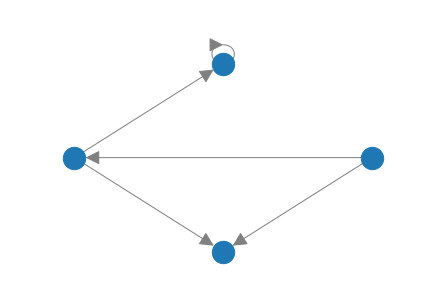

In [ ]:
G = nx.DiGraph()
#V = ['Dublin', 'Paris', 'Milan', 'Rome']
#E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
V = ['Alice', 'Bob', 'Charlie', 'Dave']
E = [('Alice','Bob'), ('Charlie','Alice'), ('Charlie','Bob'), ('Alice','Dave'), ('Dave', 'Dave')]
#G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [ ]:
print(f'Grau de entrada dos nós = { {v: G.in_degree(v) for v in G.nodes} }')
print(f'Grau de saída dos nós = { {v: G.out_degree(v) for v in G.nodes} }')

Grau de entrada dos nós = {'Milan': 1, 'Dublin': 2, 'Paris': 0, 'Rome': 1}
Grau de saída dos nós = {'Milan': 2, 'Dublin': 0, 'Paris': 2, 'Rome': 0}


## Multi Grafos

In [ ]:
directed_multi_graph = nx.MultiDiGraph()
undirected_multi_graph = nx.MultiGraph()
#V = ['Dublin', 'Paris', 'Milan', 'Rome']
#E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
V = ['Alice', 'Bob', 'Charlie', 'Dave']
E = [('Alice','Charlie'), ('Alice','Charlie'), ('Alice','Bob'), ('Bob', 'Alice'), ('Charlie','Bob'), ('Alice','Dave')]

directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

undirected_multi_graph.add_nodes_from(V)
undirected_multi_graph.add_edges_from(E)

NameError: ignored

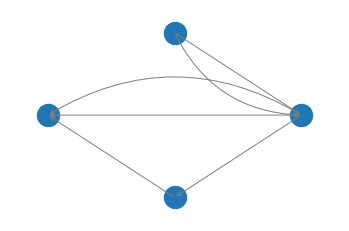

In [ ]:
import networkx as nx
G = nx.MultiGraph()
#V = {'Dublin', 'Paris', 'Milan', 'Rome'}
#E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
V = ['Alice', 'Bob', 'Charlie', 'Dave']
E = [('Charlie','Alice'), ('Charlie','Alice'), ('Bob','Charlie'), ('Bob', 'Alice'), ('Charlie','Dave'), ('Charlie','Dave')]
G.add_nodes_from(V)
G.add_edges_from(E)
pos=nx.shell_layout(G)
#pos_label = {}
#for node, coords in pos.items():
#  pos_label[node] = (coords[0], coords[1] + 0.08)
#nx.draw_networkx_labels(G, pos=pos_label, font_family='serif', font_size=20)
nx.draw_networkx_nodes(G, pos, node_size = 500, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                #shrinkA=4, shrinkB=4,
                                #patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.show()
#draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

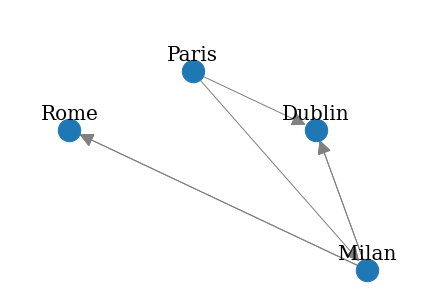

In [ ]:
draw_graph(directed_multi_graph, pos_nodes=nx.shell_layout(G), node_size=500)

NetworkXError: ignored

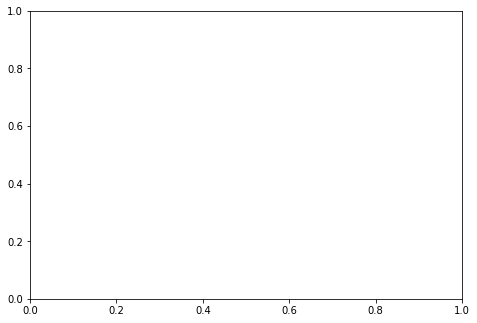

In [ ]:
draw_graph(undirected_multi_graph, pos_nodes=nx.shell_layout(G), node_size=500)

## Grafo direcionado com pesos

In [ ]:
G = nx.DiGraph()
#V = ['Dublin', 'Paris', 'Milan', 'Rome']
#E = [('Milan','Dublin', 19), ('Paris','Milan', 8), ('Paris','Dublin', 11), ('Milan','Rome', 5)]
V = ['Alice', 'Bob', 'Charlie', 'Dave']
E = [('Alice','Charlie', 7), ('Alice','Bob', 20), ('Charlie','Bob', 12), ('Alice','Dave', 5), ('Dave', 'Dave', 2)]
#G.add_nodes_from(V)
G.add_weighted_edges_from(E)

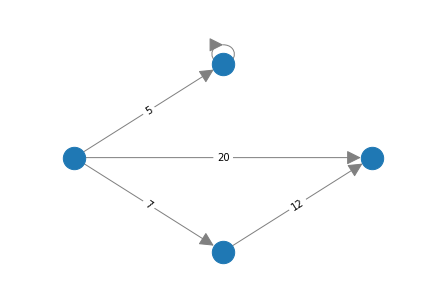

In [ ]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)

In [ ]:
print(nx.to_pandas_adjacency(G))
print(nx.to_numpy_matrix(G))
print(nx.to_pandas_edgelist(G))

        Dublin  Paris  Milan  Rome
Dublin     0.0    0.0    0.0   0.0
Paris     11.0    0.0    8.0   0.0
Milan     19.0    0.0    0.0   5.0
Rome       0.0    0.0    0.0   0.0
[[ 0.  0.  0.  0.]
 [11.  0.  8.  0.]
 [19.  0.  0.  5.]
 [ 0.  0.  0.  0.]]
  source  target  weight
0  Paris   Milan       8
1  Paris  Dublin      11
2  Milan  Dublin      19
3  Milan    Rome       5


## Grafos bipartidos

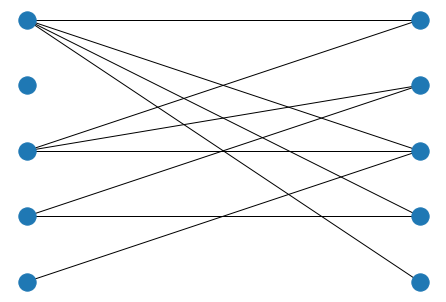

In [ ]:
import pandas as pd
import numpy as np

n_nodes = 10
n_edges = 12

bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 == 0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 == 1]
iter_edges = zip(np.random.choice(bottom_nodes, n_edges), np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([{'source' : a, 'target' : b} for a, b in iter_edges])

B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite = 0)
B.add_nodes_from(top_nodes, bipartite = 1)
B.add_edges_from([tuple(x) for x in edges.values])

from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw(B, pos=pos)

In [ ]:
def draw_graph(G, node_position, weight):
  nx.draw(G, pos = node_position, with_labels = True, font_size = 15, node_size = 400, edge_color='Gray', arrowsize = 30)
  if weight:
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G,node_position, edge_labels=edge_labels)

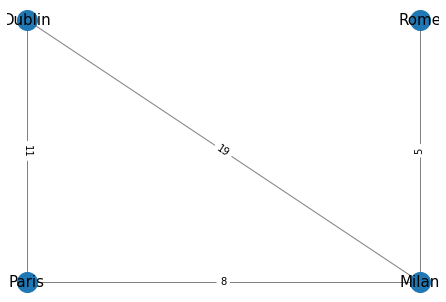

In [ ]:
G = nx.Graph()
V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Milan','Dublin', 19), ('Paris','Milan', 8), ('Paris','Dublin', 11), ('Milan','Rome', 5)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
node_position = {'Paris' : [0,0], 'Dublin' : [0,1], 'Milan' : [1,0], 'Rome' : [1,1]}
draw_graph(G, node_position, True)

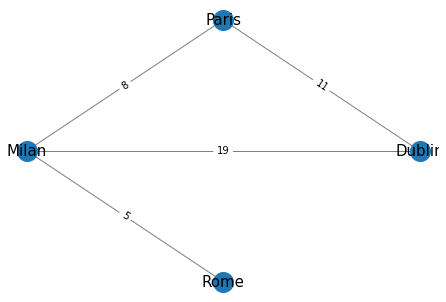

In [ ]:
node_position = nx.circular_layout(G)
draw_graph(G, node_position, True)

## Hypergrafos

In [ ]:
test_hypergraph = {
    'nodes': ['a', 'b', 'c', 'd','e'],
    'edges': [
        ('a', 'b'),
        ('b', 'c'),
        ('c', 'd'),
        ('a', 'c'),
        ('a', 'e'),
        ('b', 'd'),
        ('a', 'c', 'd'),
        ('a', 'b', 'e'),
        ('a', 'b', 'd'),
        ('a', 'b', 'c', 'd')
    ]
}

In [ ]:
from collections import defaultdict

def decompose_edges_by_len(hypergraph):
    decomposed_edges = defaultdict(list)
    for edge in hypergraph['edges']:
        decomposed_edges[len(edge)].append(edge)
    decomposition = {
        'nodes': hypergraph['nodes'],
        'edges': decomposed_edges
    }
    return decomposition

In [ ]:
import networkx as nx
from networkx import NetworkXException
import matplotlib.pyplot as plt


def plot_hypergraph_components(hypergraph):
    decomposed_graph = decompose_edges_by_len(hypergraph)
    decomposed_edges = decomposed_graph['edges']
    nodes = decomposed_graph['nodes']

    n_edge_lengths = len(decomposed_edges)
    
    # Setup multiplot style
    fig, axs = plt.subplots(1, n_edge_lengths, figsize=(5*n_edge_lengths, 5))
    if n_edge_lengths == 1:
        axs = [axs]  # Ugly hack
    for ax in axs:
        ax.axis('off')
    #fig.patch.set_facecolor('#003049')

    # For each edge order, make a star expansion (if != 2) and plot it
    for i, edge_order in enumerate(sorted(decomposed_edges)):
        edges = decomposed_edges[edge_order]
        g = nx.DiGraph()
        g.add_nodes_from(nodes)
        if edge_order == 2:
            g.add_edges_from(edges)
        else:
            for edge in edges:
                g.add_node(tuple(edge))
                for node in edge:
                    g.add_edge(node,tuple(edge))

        # I like planar layout, but it cannot be used in general
        try:
            pos = nx.planar_layout(g)
        except NetworkXException:
            pos = nx.spring_layout(g)

        # Plot true nodes in orange, star-expansion edges in red
        extra_nodes = set(g.nodes) - set(nodes)
        nx.draw_networkx_nodes(g, pos, node_size=300, nodelist=nodes, 
                               ax=axs[i])
        nx.draw_networkx_nodes(g, pos, node_size=150, nodelist=extra_nodes, 
                               node_shape='^',
                               ax=axs[i], node_color='#d62828')

        nx.draw_networkx_edges(g, pos, ax=axs[i],
                               arrowstyle='-')

        # Draw labels only for true nodes
        labels = {node: str(node) for node in nodes}
        #nx.draw_networkx_labels(g, pos, labels, ax=axs[i])

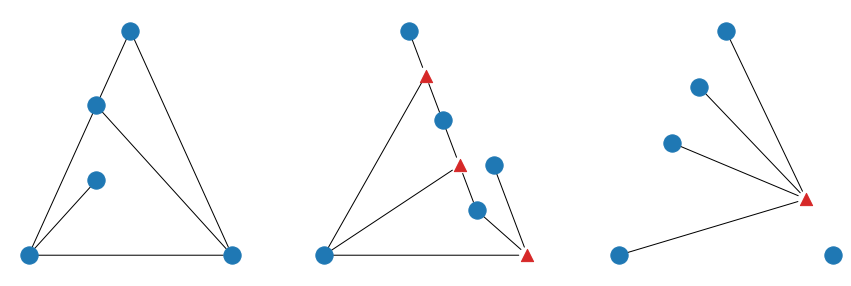

In [ ]:
plot_hypergraph_components(test_hypergraph)

# 1.2 Propriedades de Grafos

### Funções de plotagem

In [ ]:
# draw a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G)

    plt.figure(figsize=(5,5),dpi=100)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

### Caminho mais curto

In [ ]:
G = nx.Graph()
nodes = {1 : 'Dublin', 2 : 'Paris', 3 : 'Milan', 4 : 'Rome', 5 : 'Naples', 6 : 'Moscow', 7 : 'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (6,7), (7,5)])

In [ ]:
path = nx.shortest_path(G, source=1, target=7)
print(path)

[1, 3, 4, 5, 7]


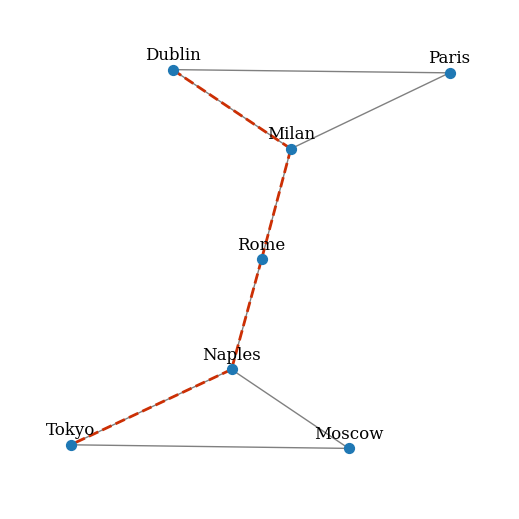

In [ ]:
draw_enhanced_path(G, path, node_names=nodes)

In [ ]:
nx.average_shortest_path_length(G)

2.1904761904761907

### Eficiência

In [ ]:
nx.global_efficiency(G)

0.611111111111111

In [ ]:
nx.local_efficiency(G)

0.6666666666666667

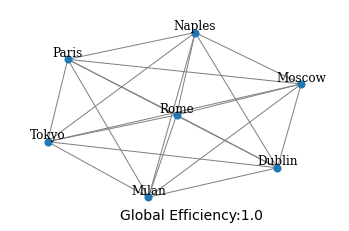

In [ ]:
# Maior eficiência
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes)

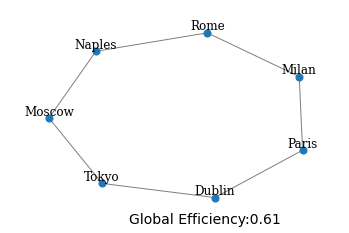

In [ ]:
# menor efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes)

### Coeficiente de clusterizacao

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [ ]:
nx.average_clustering(G)

0.6666666666666667

In [ ]:
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

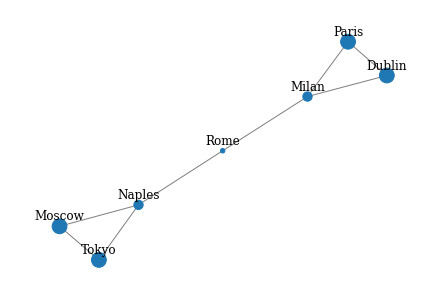

In [ ]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size)

In [ ]:
nx.transitivity(G)

0.5454545454545454

In [ ]:
import networkx.algorithms.community as nx_comm
nx_comm.modularity(G, communities=[{1, 2, 3}, {4, 5, 6, 7}])

0.3671875

### Centralidades

In [ ]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Degree centrality,0.333333,0.333333,0.5,0.333333,0.5,0.333333,0.333333


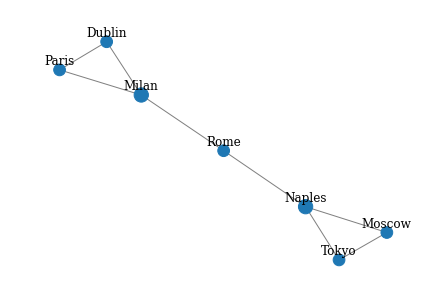

In [ ]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

In [ ]:
nx.closeness_centrality(G)

{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Closeness centrality,0.4,0.4,0.545455,0.6,0.545455,0.4,0.4


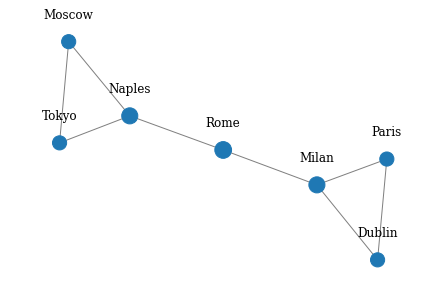

In [ ]:
dc = nx.closeness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodes.values()
df

In [ ]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Betweenness centrality,0.0,0.0,0.533333,0.6,0.533333,0.0,0.0


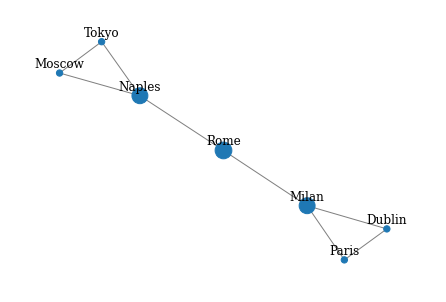

In [ ]:
dc = nx.betweenness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodes.values()
df

### Assortatividade

In [ ]:
print(nx.degree_pearson_correlation_coefficient(G))
print(nx.degree_assortativity_coefficient(G))

-0.6
-0.6


# 1.3 Benchmarks e exemplos

## Funções de plotagem

In [ ]:
output_dir = "./figures"

def draw_graph(G, node_names={}, filename=None, node_size=50, layout = None):
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None, layout=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    
    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")

## Exemplos

In [ ]:
complete = nx.complete_graph(n=7)
lollipop = nx.lollipop_graph(m=7, n=3)
barbell = nx.barbell_graph(m1=7, m2=4)

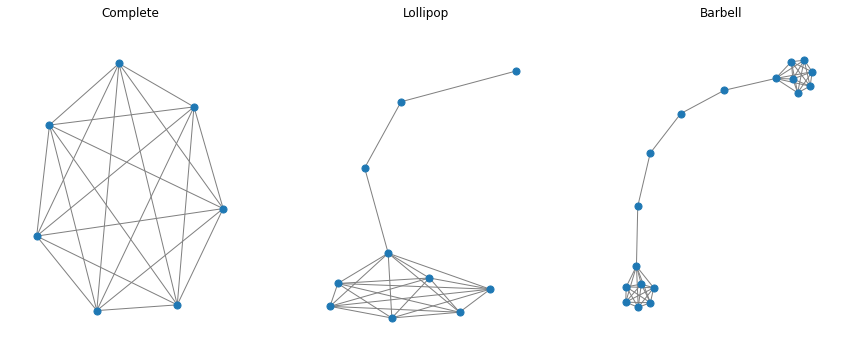

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
draw_graph(complete)
plt.title("Complete")
plt.subplot(1,3,2)
plt.title("Lollipop")
draw_graph(lollipop)
plt.subplot(1,3,3)
plt.title("Barbell")
draw_graph(barbell)

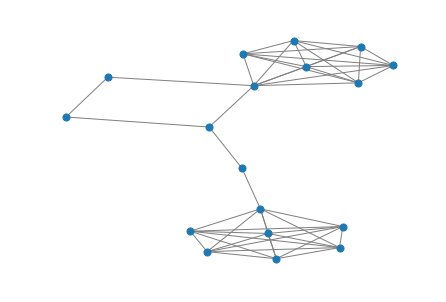

In [ ]:
def get_random_node(graph):
  return np.random.choice(graph.nodes)

all_graphs = nx.compose_all([complete, barbell, lollipop])
all_graphs.add_edge(get_random_node(lollipop), get_random_node(lollipop))
all_graphs.add_edge(get_random_node(complete), get_random_node(barbell))

draw_graph(all_graphs, layout=nx.kamada_kawai_layout)

## Modelos generativos

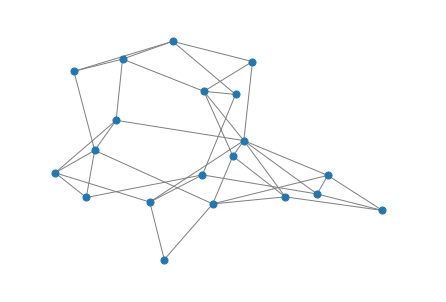

In [ ]:
# P = 1 -> grafo aleatório
# 0 < 1 < p -> grafo small world
graph = nx.watts_strogatz_graph(n=20, k=5, p=0.2)
draw_graph(graph)

In [ ]:
ba_model = nx.extended_barabasi_albert_graph(n=20, m=1, p=0, q=0)
degree = dict(nx.degree(ba_model)).values()

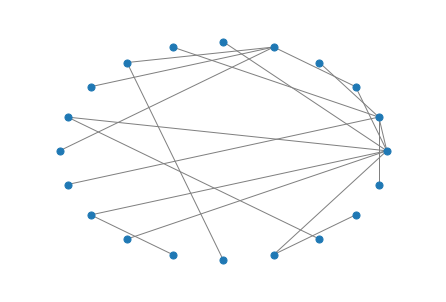

In [ ]:
draw_graph(ba_model, layout=nx.circular_layout)

In [ ]:
n = 1E5
bag = nx.extended_barabasi_albert_graph(n,m=1,p=0,q=0)

In [ ]:
degree = dict(nx.degree(bag)).values()

In [ ]:
bins = np.round(np.logspace(np.log10(min(degree)), np.log10(max(degree)), 10))

In [ ]:
from collections import Counter
cnt = Counter(np.digitize(np.array(list(degree)), bins))

Text(0, 0.5, 'P(k)')

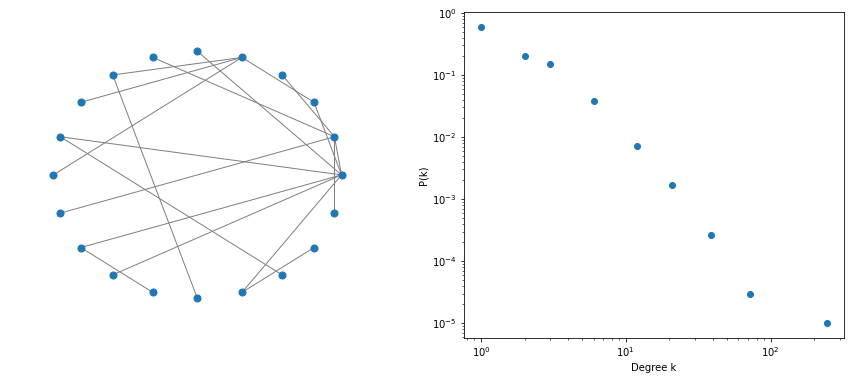

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
draw_graph(ba_model, layout=nx.circular_layout)
plt.subplot(1,2,2)
x, y = list(zip(*[(bins[k-1], v/n) for k, v in cnt.items()]))
plt.plot(x, y, 'o'); plt.xscale("log"); plt.yscale("log")
plt.xlabel("Degree k")
plt.ylabel("P(k)")

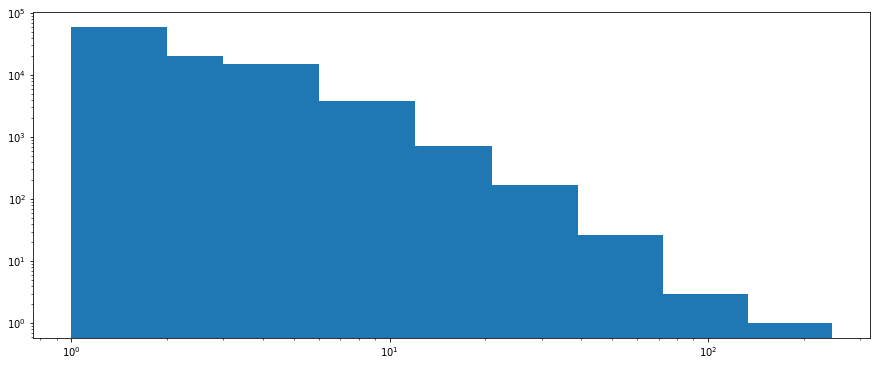

In [ ]:
plt.figure(figsize=(15, 6))

plt.hist(degree, bins=bins)
plt.xscale("log")
plt.yscale("log")

In [ ]:
graph = nx.florentine_families_graph()

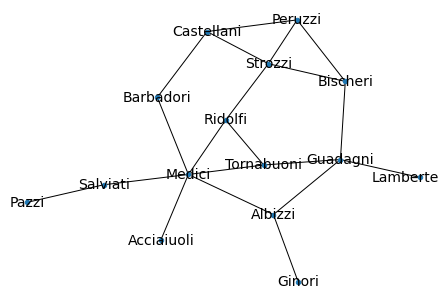

In [ ]:
nx.draw_kamada_kawai(graph, with_labels=True, node_size=20, font_size=14)

## Benchmarks

In [ ]:
from scipy.io import mmread

In [ ]:
cd drive/MyDrive/Teste_python/

/content/drive/MyDrive/Teste_python


In [ ]:
file = 'ca-AstroPh.mtx'
adj_matrix = mmread(file)

In [ ]:
graph = nx.from_scipy_sparse_matrix(adj_matrix)

In [ ]:
degree = nx.degree(graph)
degrees = dict(degree)

In [ ]:
ci = nx.clustering(graph)

In [ ]:
centrality = nx.centrality.eigenvector_centrality(graph)
#betweenness = nx.centrality.betweenness_centrality(graph)

In [ ]:
stats = pd.DataFrame({
    'autovetor' : centrality,
    'c_i' : ci,
    'grau' : degrees
})

In [ ]:
stats.head()

,autovetor,c_i,grau
0,8.901198e-05,0.692137,43
1,3.208282e-10,1.000000,2
2,3.407931e-04,0.242424,12
3,4.290384e-06,0.000000,1
4,6.722036e-07,1.000000,2


In [ ]:
stats.loc[stats['grau'].idxmax()]

autovetor      0.145652
c_i            0.088903
grau         504.000000
Name: 6933, dtype: float64

In [ ]:
neighbors = [n for n in nx.neighbors(graph, 6933)]

In [ ]:
sampling = 0.1
nTop = round(len(neighbors) * sampling)
idx = {
    'random' : stats.loc[neighbors].sort_index().index[:nTop],
    'centralidade' : stats.loc[neighbors].sort_values('autovetor', ascending = False).index[:nTop],
    'c_i' : stats.loc[neighbors].sort_values('c_i', ascending=False).index[:nTop]
}

In [ ]:
def plotSubgraph(graph, indices, center = 6933):
  nx.draw_kamada_kawai(
      nx.subgraph(graph, list(indices) + [center])
  )

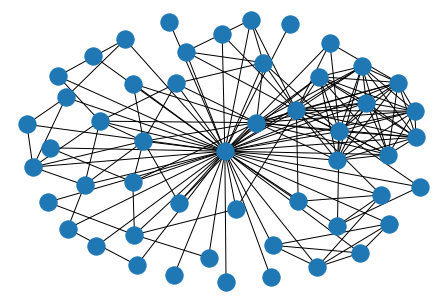

In [ ]:
plotSubgraph(graph, idx['random'])

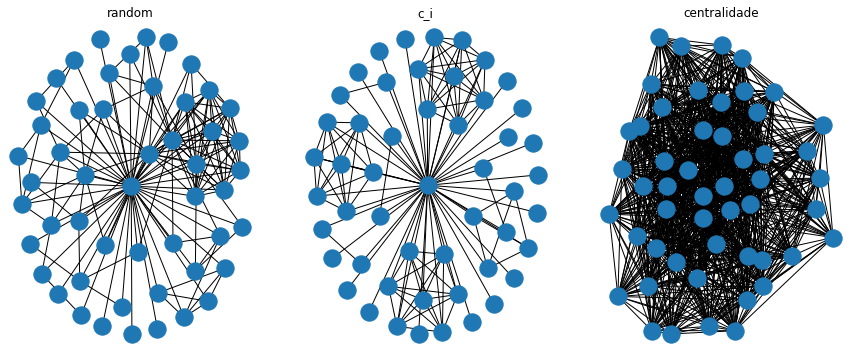

In [ ]:
plt.figure(figsize=(15,6))
for i, title in enumerate(['random', 'c_i', 'centralidade']):
  plt.subplot(1,3, i+1)
  plotSubgraph(graph, idx[title])
  plt.title(title)

In [ ]:
nx.write_gexf(graph, 'ca_AstroPh.gexf')

# 2.1 Graph Machine Learning

## Plotar gráficos

In [ ]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Node2Vec

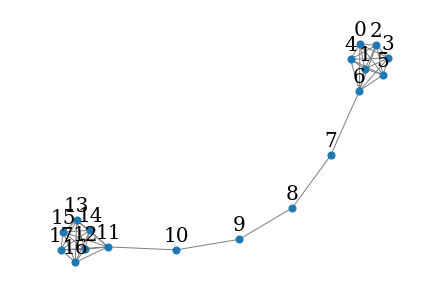

In [ ]:
G = nx.barbell_graph(m1=7, m2=4)
draw_graph(G, nx.spring_layout(G))

In [ ]:
print(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [ ]:
n2v = Node2Vec(G,dimensions=2)
model = n2v.fit(window=10)

Generating walks (CPU: 1):  30%|███       | 3/10 [00:00<00:00, 26.78it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 15.36it/s]


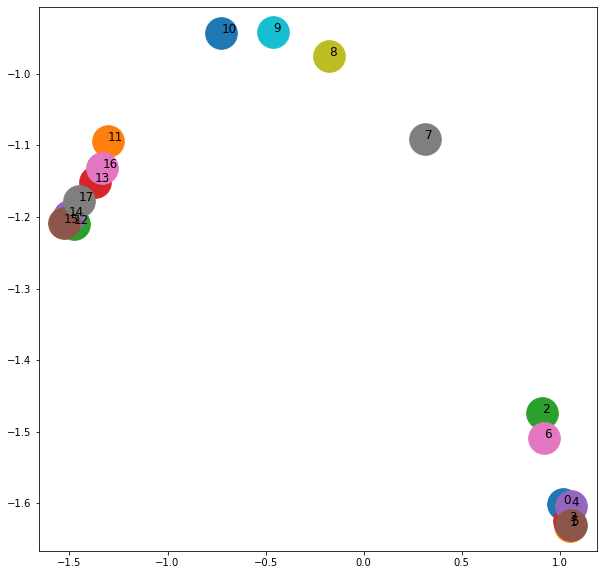

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
  v = model.wv.get_vector(str(x))
  ax.scatter(v[0], v[1], s=1000)
  ax.annotate(str(x), (v[0], v[1]), fontsize=12)

## Edge2Vec

In [ ]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

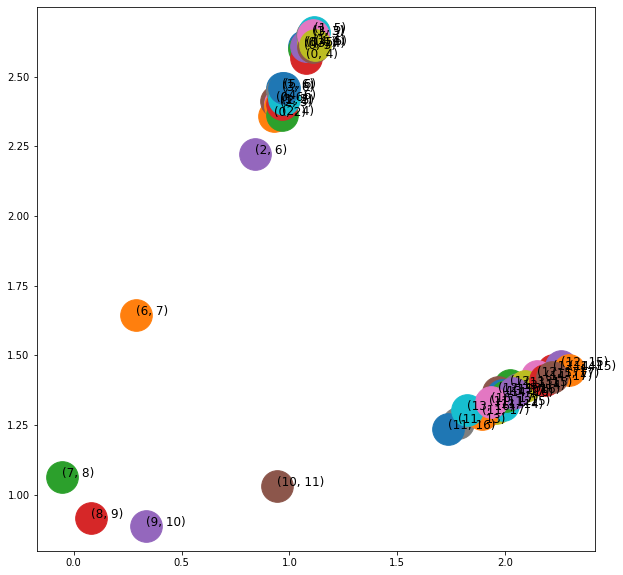

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## Graph2Vec

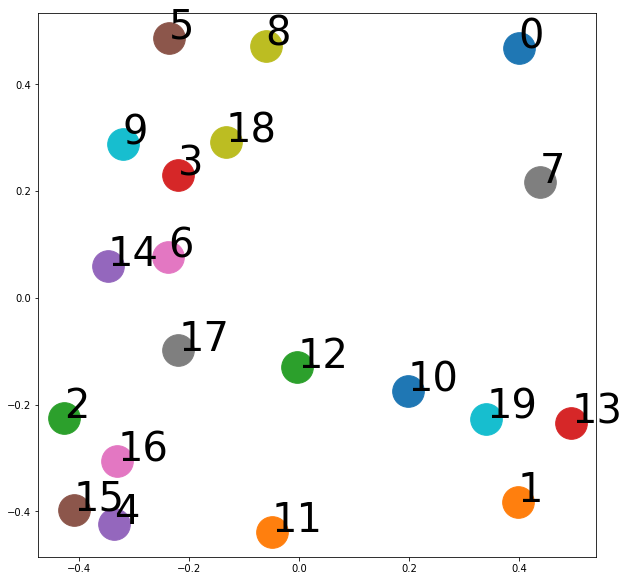

In [ ]:
n_graphs = 20
def generate_random():
  n = random.randint(5, 20)
  k = random.randint(5, n)
  p = random.uniform(0,1)
  return nx.watts_strogatz_graph(n, k, p)

Gs = [generate_random() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2)
model.fit(Gs)
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)

# 3 Unsupervised Graph Learning

## Plotar gráficos

In [ ]:
def draw_graph(G, node_names={}, node_size=500):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=True, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    #nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    plt.show()

## Graph Factorization

In [ ]:
from pathlib import Path
Path("gem/intermediate").mkdir(parents=True, exist_ok=True)

In [ ]:
from gem.embedding.gf import GraphFactorization

In [ ]:
G = nx.barbell_graph(m1=10, m2=4)
gf = GraphFactorization(d=2, data_set=None, max_iter=10000,
                        eta=1*10**-4, regu=1.0)
gf.learn_embedding(G)
embeddings = gf.get_embedding

[Errno 2] No such file or directory: 'gem/c_exe/gf': 'gem/c_exe/gf'
./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission
		Iter id: 0, Objective: 95.0058, f1: 95.0016, f2: 0.00420307


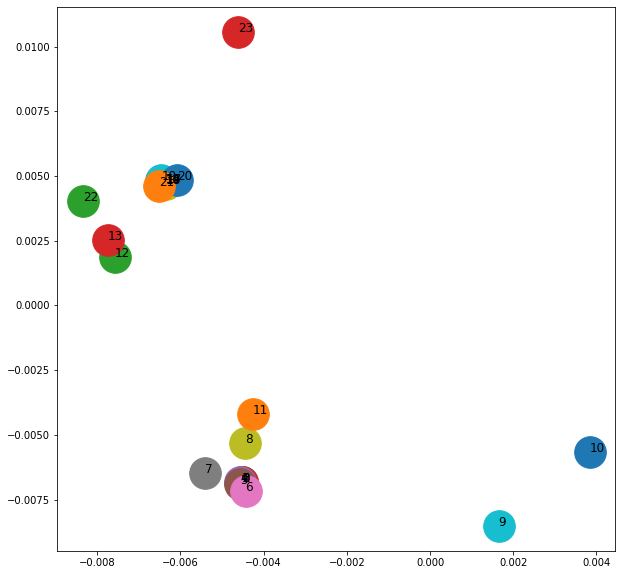

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = gf.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## HOPE

In [ ]:
from gem.embedding.hope import HOPE

In [ ]:
G = nx.barbell_graph(m1=10, m2=4)
hp = HOPE(d=4, beta=0.01)
hp.learn_embedding(G)
embeddings = hp.get_embedding()

SVD error (low rank): 0.052092


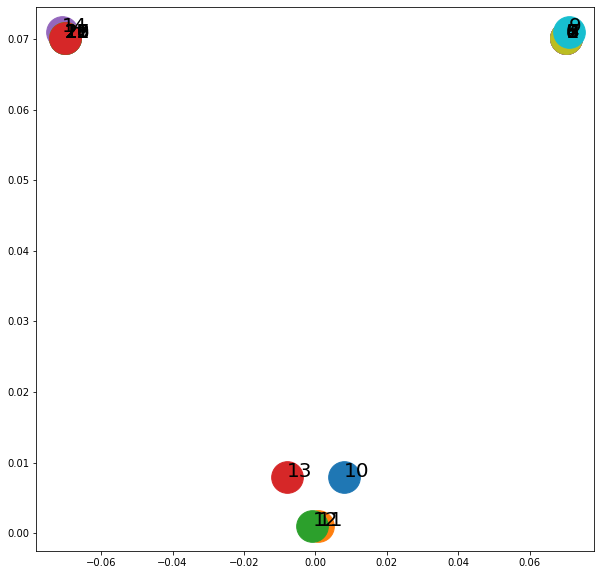

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = hp.get_embedding()[x,2:]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=20)

## GraphRep

In [ ]:
from karateclub.node_embedding.neighbourhood.grarep import GraRep

In [ ]:
G = nx.barbell_graph(m1=10, m2=4)
gr = GraRep(dimensions=2, order=3)
gr.fit(G)
embeddings = gr.get_embedding()

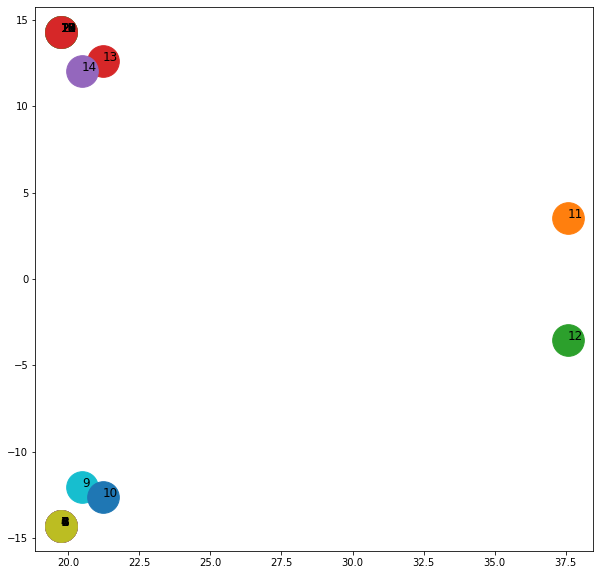

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ida = 4
idb = 5
for x in G.nodes():
    
    v = gr.get_embedding()[x]
    ax.scatter(v[ida],v[idb], s=1000)
    ax.annotate(str(x), (v[ida],v[idb]), fontsize=12)

## DeepWalk

In [ ]:
from karateclub.node_embedding.neighbourhood.deepwalk import DeepWalk

In [ ]:
G = nx.barbell_graph(m1=10, m2=4)
dw = DeepWalk(dimensions=2, walk_number=100)
dw.fit(G)
embeddings = dw.get_embedding()

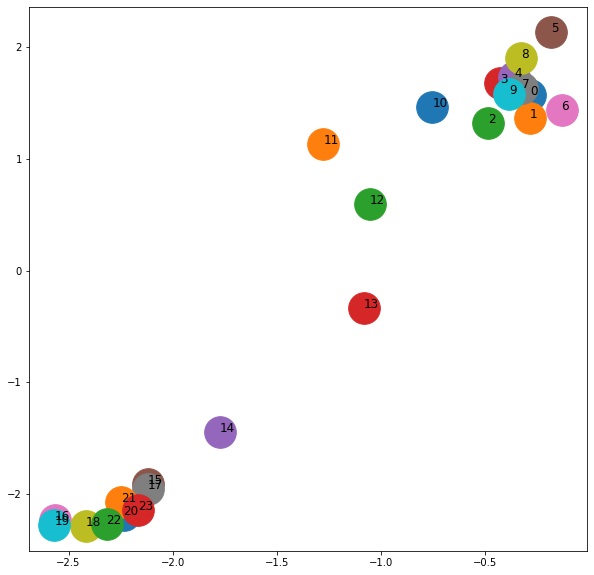

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = dw.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## Node2Vec

Generating walks (CPU: 1):  20%|██        | 2/10 [00:00<00:00, 15.39it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  9.93it/s]


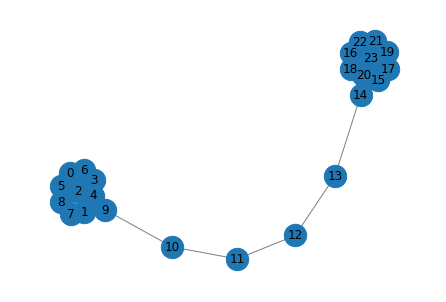

In [ ]:
G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)
n2v = Node2Vec(G,dimensions=2)
model = n2v.fit(window=10)
embeddings = model.wv

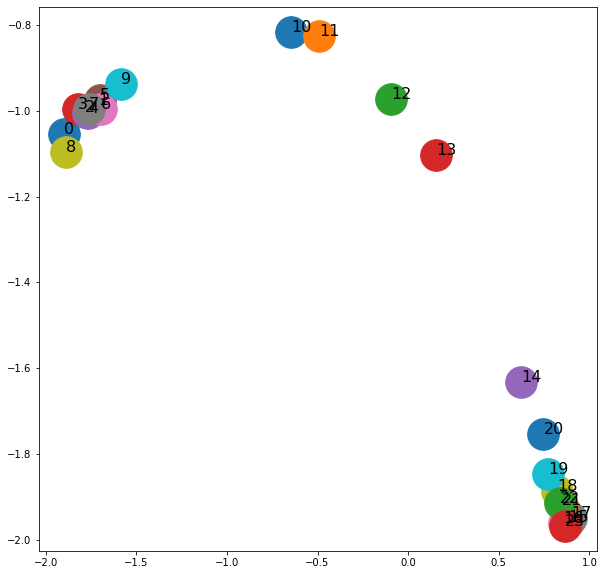

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = model.wv[str(x)]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

## Edge2Vec

In [ ]:
embedding = HadamardEmbedder(keyed_vectors=model.wv)

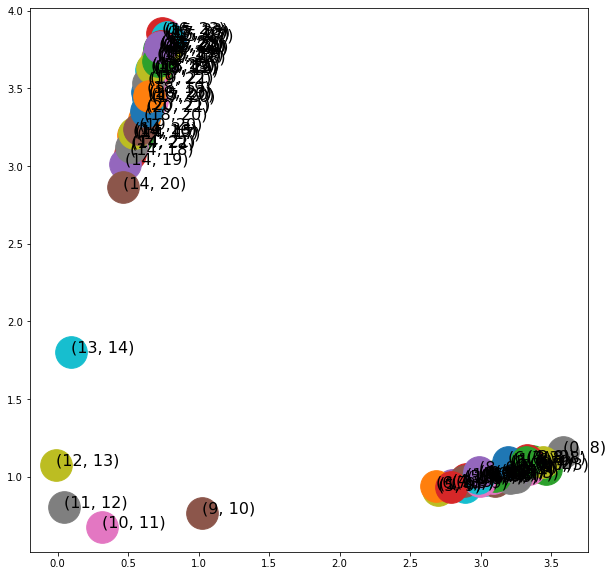

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = embedding[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

## Autoencoder

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
classes = {
    0:"T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot", 
}

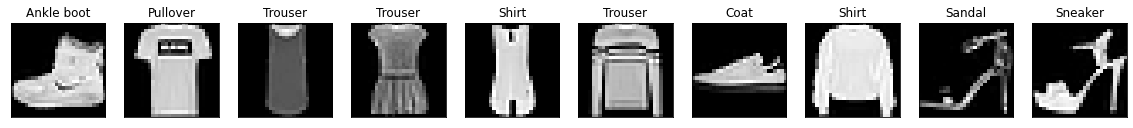

In [ ]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x_train[i])
  plt.title(classes[y_test[i]])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
from tensorflow.keras.layers import Flatten, Conv2D, Dropout, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras import Model

In [ ]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [ ]:
Model(input_img, encoded).summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [ ]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

In [ ]:

Model(input_img, decoded).summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
'''autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=128,
shuffle=True,
validation_data=(x_test, x_test))'''

'autoencoder.fit(x_train, x_train,\nepochs=50,\nbatch_size=128,\nshuffle=True,\nvalidation_data=(x_test, x_test))'

## Graph neural networks

### Spectral Graph Convolution

In [ ]:
#from gem.embedding.sdne import SDNE

In [ ]:
from scipy.linalg import sqrtm

In [ ]:
G = nx.barbell_graph(m1 = 10, m2 = 2)

In [ ]:
A = nx.to_numpy_matrix(G)
I = np.eye(G.number_of_nodes())

In [ ]:
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.array(np.diag(D_hat))
D_hat = np.linalg.inv(sqrtm(D_hat))
A_norm = D_hat @ A_hat @ D_hat

In [ ]:
def glorot_init(nin, nout):
  sd = np.sqrt(6.0 / (nin + nout))
  return np.random.uniform(-sd, sd, size=(nin, nout))

class GCNLayer():
  def __init__(self, n_inputs, n_outputs):
      self.n_inputs = n_inputs
      self.n_outputs = n_outputs
      self.W = glorot_init(self.n_outputs, self.n_inputs)
      self.activation = np.tanh
    
  def forward(self, A, X):
      self._X = (A @ X).T # (N,N)*(N,n_outputs) ==> (n_outputs,N)
      H = self.W @ self._X # (N, D)*(D, n_outputs) => (N, n_outputs)
      H = self.activation(H)
      return H.T # (n_outputs, N)

In [ ]:
gcn1 = GCNLayer(G.number_of_nodes(), 8)
gcn2 = GCNLayer(8,4)
gcn3 = GCNLayer(4,2)

H1 = gcn1.forward(A_hat, I)
H2 = gcn2.forward(A_hat, H1)
H3 = gcn3.forward(A_hat, H2)

embeddings = H3

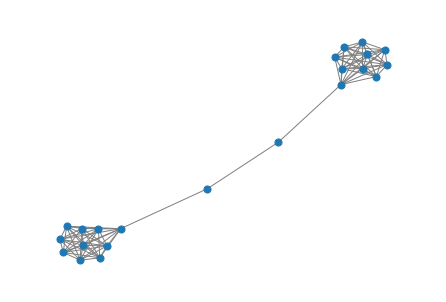

In [ ]:
def draw_graph(G, filename=None, node_size=50):
  pos_nodes = nx.spring_layout(G)
  nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
  
  pos_attrs = {}
  for node, coords in pos_nodes.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.08)

  plt.axis('off')
  axis = plt.gca()
  axis.set_xlim([1.2*x for x in axis.get_xlim()])
  axis.set_ylim([1.2*y for y in axis.get_ylim()])

embeddings = np.array(embeddings)
draw_graph(G)

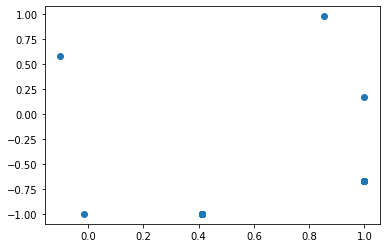

In [ ]:
plt.scatter(embeddings[:, 0], embeddings[:, 1])
#plt.savefig('embedding_gcn.png',dpi=300)

### Spatial Graph Convolution

In [ ]:
import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, metrics, Model
from IPython.display import display, HTML

In [ ]:
dataset = sg.datasets.PROTEINS()
graphs, graph_labels = dataset.load()

In [ ]:
display(HTML(dataset.description))

In [ ]:
# let's print some info to better understand the dataset
print(graphs[0].info())
graph_labels.value_counts().to_frame()

StellarGraph: Undirected multigraph
 Nodes: 42, Edges: 162

 Node types:
  default: [42]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [162]
        Weights: all 1 (default)
        Features: none


,label
1,663
2,450


In [ ]:
generator = sg.mapper.PaddedGraphGenerator(graphs)

In [ ]:
# define a GCN model containing 2 layers of size 64 and 32, respectively. 
# ReLU activation function is used to add non-linearity between layers
gc_model = sg.layer.GCNSupervisedGraphClassification(
    [64, 32], ["relu", "relu"], generator, pool_all_layers=True
)


# retrieve the input and the output tensor of the GC
# layer such that they can be connected to the next layer
inp1, out1 = gc_model.in_out_tensors()
inp2, out2 = gc_model.in_out_tensors()

vec_distance = tf.norm(out1 - out2, axis=1)

# create the model. It is also useful to create a
# specular model in order to easily retrieve the embeddings
pair_model = Model(inp1 + inp2, vec_distance)
embedding_model = Model(inp1, inp2)

In [ ]:
def graph_distance(graph1, graph2):
    spec1 = nx.laplacian_spectrum(graph1.to_networkx(feature_attr=None))
    spec2 = nx.laplacian_spectrum(graph2.to_networkx(feature_attr=None))
    k = min(len(spec1), len(spec2))
    return np.linalg.norm(spec1[:k] - spec2[:k])

In [ ]:
graph_idx = np.random.RandomState(0).randint(len(graphs), size=(100, 2))
targets = [graph_distance(graphs[left], graphs[right]) for left, right in graph_idx]
train_gen = generator.flow(graph_idx, batch_size=10, targets=targets)

In [ ]:
pair_model.compile(optimizers.Adam(1e-2), loss="mse")

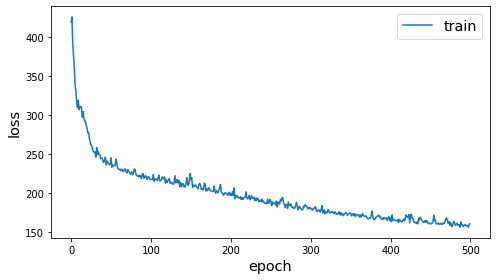

In [ ]:
history = pair_model.fit(train_gen, epochs=500, verbose=0)
sg.utils.plot_history(history)

In [ ]:
# retrieve the embeddings
#embeddings = embedding_model.predict(generator.flow(graphs))

# 4 Supervised Graph Learning

## Feature based methods

In [ ]:
from stellargraph import datasets
dataset = datasets.PROTEINS()

In [ ]:
display(HTML(dataset.description))

In [ ]:
graphs, graph_labels = dataset.load()

In [ ]:
# convert graphs from StellarGraph format to numpy adj matrices
adjs = [graph.to_adjacency_matrix().A for graph in graphs]
# convert labes fom Pandas.Series to numpy array
labels = graph_labels.to_numpy(dtype=int)

In [ ]:
metrics = []
for adj in adjs:
  G = nx.from_numpy_matrix(adj)
  # basic properties
  num_edges = G.number_of_edges()
  # clustering measures
  cc = nx.average_clustering(G)
  # measure of efficiency
  eff = nx.global_efficiency(G)

  metrics.append([num_edges, cc, eff])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(metrics, labels, test_size=0.3, random_state=42)

In [ ]:
# As commonly done in many Machine Learning workflows, we preprocess features to have zero mean and unit standard deviation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = svm.SVC()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print('Accuracy', accuracy_score(y_test,y_pred))
print('Precision', precision_score(y_test,y_pred))
print('Recall', recall_score(y_test,y_pred))
print('F1-score', f1_score(y_test,y_pred))

Accuracy 0.7455089820359282
Precision 0.7709251101321586
Recall 0.8413461538461539
F1-score 0.8045977011494253


## Shallow embedding

# 6 Redes Sociais

In [ ]:
!wget http://snap.stanford.edu/data/facebook_combined.txt.gz
!wget http://snap.stanford.edu/data/facebook.tar.gz
!gzip -d facebook_combined.txt.gz
!tar -xf facebook.tar.gz

--2021-08-03 19:37:04--  http://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K   288KB/s    in 0.7s    

2021-08-03 19:37:05 (288 KB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]

--2021-08-03 19:37:05--  http://snap.stanford.edu/data/facebook.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732104 (715K) [application/x-gzip]
Saving to: ‘facebook.tar.gz’

facebook.tar.gz     100%[===================>] 714.95K   689KB/s    in 1.0s    

2021-08-03 19:37:06 (689 KB/s) - ‘facebook.tar.gz’ saved [732

In [ ]:
ls

ca_AstroPh.gexf  embedding_gcn.png      facebook.tar.gz
ca_AstroPh.gext  facebook/              gem/
ca-AstroPh.mtx   facebook_combined.txt  GraphGAN/


In [ ]:
!head facebook_combined.txt

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10


In [ ]:
G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [ ]:
# Each file in the "facebook" directory is named as nodeId.format
# where nodeId is the id of an ego-user and format is the format of the file
ego_nodes = set([int(name.split('.')[0]) for name in os.listdir("facebook/")])

In [ ]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G)

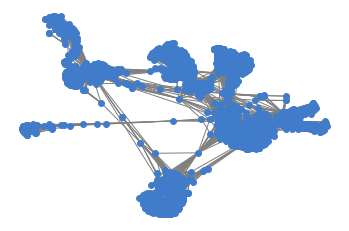

In [ ]:
plt.axis("off")
nx.draw_networkx(G, pos=spring_pos, node_color=default_node_color, edge_color=default_edge_color, with_labels=False, node_size=35)